# Overview

Quick note: you can use the 'in' operator to search for items in a list

In [1]:
'e' in ['a','b','c','d']

False

In [4]:
'a' in ['a','b','c','d']

True

The question now becomes 'how is the "in" function working and searching algorithmically through the list? What is the best way to seach through a list?

# Sequential Search

Sequential search is a basic searching technique where you go through the entire data structure, whilst comparing elements. This would be order O(n) because you are going to spend 'n' time because you have to go through every element of the list. However, if the list was ordered, we only need to search until we get to an item which has a value greater than the thing we are searching for, saving time. 

For an unordered list, if the item is present in the list, your best case would be O(1), worst case would be O(n), and the average case would be O(n/2). If the item was not present, then you would have a best case of O(n), worst case of O(n) and an average case of O(n).

However, if your data structure is ordered, you would have a best case of O(1), Worst case of O(n) and average case of O(n/2) regardless of whether the item is in the list or not.

Now, let's implement the Sequential Search!

### Implementation of Sequential Search

This function is for an unordered list:

In [12]:
def SeqSearch(array, search_for):
    position = 0
    is_found = False
    while position < len(array) and is_found == False:
        if array[position] == search_for:
            is_found = True
        else:
            position += 1
    return is_found

In [13]:
SeqSearch(['a','b','c','d'],'a')

True

This is for the ordered list:

In [14]:
def OrdSeqSearch(array, search_for):
    '''
    Input array must be sorted for this to work 
    '''
    position = 0
    is_found = False
    stop = False
    
    while position < len(array) and is_found == False and stop == False:
        
        if array[position] == search_for:
            is_found = True
            
        else:
            
            if array[position] > search_for:
                stop = True
            
            position += 1
            
    return is_found

In [15]:
SeqSearch([1,3,4,5,7,8,135898938],5)

True

In [16]:
SeqSearch([1,3,4,5,7,8,135898938],6)

False

# Binary Search

Binary search is a type of search in which we can take a *huge* advantage of the ordered list. Instead of searching the list in sequence, it first takes the middle item. If it is greater than the goal, then you go to the middle of the first half and if it is lesser then you go to the middle of the seccond half. THis process repeats until you find the item.  

Binary search uses Divide and Conquer, as it divides the problem into smaller pieces, solves them, and reasembles them to get the answer. 

On average the Binary Search uses O(n/(2^i)) complexity, where i represents the number of comparisons required

### Implementation: Iterative

In [22]:
def IterBinSearch(array, search_for):
    
    first = 0
    last = len(array)-1
    is_found = False
    
    while first <= last and is_found == False:
        middle = (first + last)//2
        
        if array[middle] == search_for:
            is_found = True
            
        elif array[middle] > search_for:
            last = middle - 1
            
        elif array[middle] < search_for:
            first = middle + 1
    return is_found        

In [24]:
IterBinSearch([1,3,4,5,7,8,135898938],6)

False

### Implementation: Recursive

In [12]:
def RecBinSearch(array,search_for):
    
    if len(array) == 0:
        return -1
    else:
        if array[len(array)//2] == search_for:
            return len(array)//2
        else:
            if array[len(array)//2] > search_for:
                return RecBinSearch(array[:(len(array)//2)],search_for)
            else:
                return RecBinSearch(array[(len(array)//2)+1:],search_for)

In [13]:
RecBinSearch([-1,0,3,5,9,12],9)

0

# Hashing

It turns out, we can bulid a data structure that can be searched in O(1) time. THis concept is known as hashing.

A Hash Table is a collection of things which are sorted so that you can find them quickly later. Each part of the hash table is called a slot, and can hold an item and is named by a integer starting with 0. You will have a slot called 0, then 1, then 2, etc etc, just like list indecees. Hash tables are empty at the start, so each slot is empty.

Hash tables can be implemented by using a list with each element set to value None.

### Hash Functions

The mapping between the element and the slot where it belongs is called the Hash Function. THe hash function will take any element and return the integer in the range of the slot names, so between 0 and the size - 1. 

One possible hash function is the remainder method. When an item is given, the hash function is the item divied by table size. THis is then the slot number. An example would be:

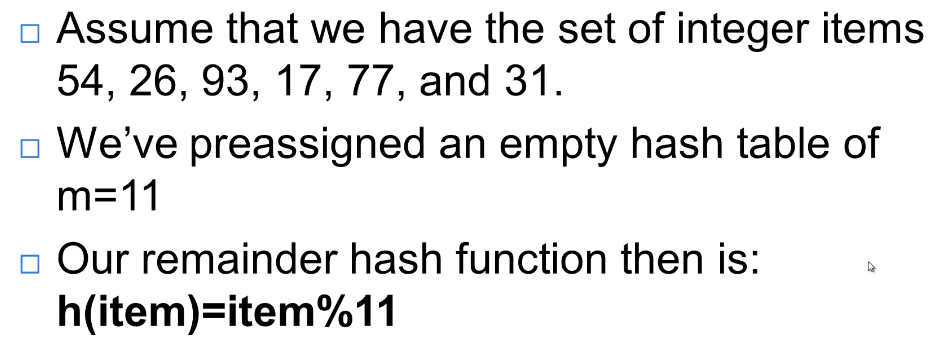

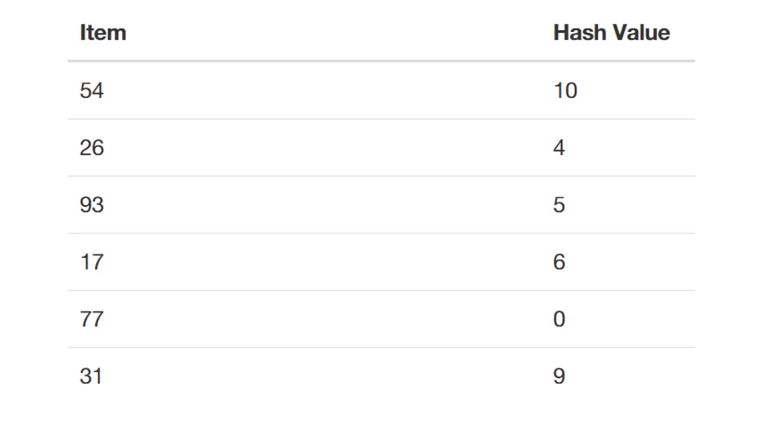

In the above example, we are now ready to fill 6 out of the 11 slots of the hash table. This is called the load factor, and is dentoted as:

Load_Factor = number_of_items/table_size

Here, our load factor would be 6/11. When we want to search for an item, we just use the hash function to find the slot name for the item wea are searching for, and then look at the hash table to see if it is there. This would be in O(1) time because you have to do one calculation and one indexing each time, making it constant

But what if you have two items at the same location ( in this example, what if you had the item 44 )?. This is called a collision or a clash, but we will find out how to deal with them later on.

A hash function that can map each item to a unique slot is called a perfect hash function. We want to create a hash function that can reduce the number of collissions, can easily be calculated, and evenly distributes items. Here are a few good techniques:

1. Folding Method: This works by dividing the item into equal pieces (equal in length, not value), although the last piece may not be equal. The pieces are added together to get the hash value. For example, if you had the number of 436-555-4601, you could then turn it into 43-65-55-46-01 because you broke it up into groups of two, then you add it all together to get 210, then because your hash table has length 11, you find the remainder of 210 and 11, which is 1, so your hash is 1 

2. Mid Square Method: You first square the number, then take some out of the digits. For example, if the item was 14, your thing would be 196, and you could take the digits 19 from it. THen you could do the remainder step to get that 19 % 11 = 8 so it would hash to 8.

But what if you had a non-integer item ( for example, the string 'cat' ). Well, you can think of a string as a sequence of ordinal values, which are numbers. You can use the build in function ord() to find ordinal values of individual characters:

In [2]:
ord('c')

99

In [3]:
ord('a')

97

In [4]:
ord('t')

116

You could then use those values for whatever hash function you wanted.

### Collision resolution

One way to resolve collisions goes into the hash table and tries to find an open slot to keep the thing thatcaused the collision. You would loop through the origional hash value and then iterate through the slot till the first open placeis found. This is called Open Addressing, or more specifically linear probing

To prevent clusters from forming, we can use spacing to skip slots. The name for looking for another slot after collision is called rehashing. A variant of linear probing is called quadratic probing, where instead of using a constant skip value, we use a rehash function thta increments the hash value exponentially (1, 3, 5, 7, 9 as different skip values).

Another method is to let each slot to hold a reference to a collection or chain of other items. This method, Chaining, allows many items to be at the same location. THerefore, when a collision happens, the item still goes in the same spot.

### Hash table implementation

In [27]:
class HashTable(object):
    
    def __init__(self,size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
    
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))
                    
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                    
                else:
                    self.data[nextslot] = data
        
    def hashfunction(self,key,size):
        return key % size
    
    def rehash(self,oldhash, size):
        return (oldhash+1)% size
    
    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))
        data = None
        stop = False
        found = False
        position = startslot
        
        while self.slots[position] != None and not found and not stop:
            
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position = self.rehash(pisiont,len(self.slots))
                
                if position == starslot:
                    stop = True
        return data
    
    def __getitem__(self,key):
        return self.get(key)
    
    def __setitem__(self,key,data):
        self.put(key,data)

In [28]:
h = HashTable(5)

In [29]:
h[1] = 'one'

In [30]:
h.slots

[None, 1, None, None, None]

In [31]:
h[2] = 'two'

In [32]:
h[6] = 'six'

In [33]:
h.slots

[None, 1, 2, 6, None]

In [34]:
h[1]

'one'

In [35]:
h.data

[None, 'one', 'two', 'six', None]

### Hash table: Improved with chaining and Mid-Square method

In [65]:
class HashTableTwo(object):
    
    def __init__(self,size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
    
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data
            else:
                self.slots[hashvalue] = [self.slots[hashvalue]] + [key]
                self.data[hashvalue] = [self.data[hashvalue]] + [data]
        
    def hashfunction(self,key,size):
        s = key ** 2
        if len(str(s)) >= 2:
            return int(str(s)[:2]) % size
        else:
            return s % size
    
    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))
        if type(self.slots[startslot]) == str:
            return self.data[startslot]
        else:
            innerpos = self.slots[startslot].index(key)
            return self.data[startslot][innerpos]
        
    def __getitem__(self,key):
        return self.get(key)
    
    def __setitem__(self,key,data):
        return self.put(key,data)

In [66]:
h = HashTableTwo(5)

In [67]:
h[1] = 'one'

In [68]:
h.slots

[None, 1, None, None, None]

In [69]:
h[2] = 'two'

In [70]:
h[6] = 'six'

In [71]:
h.slots

[None, [1, 6], None, None, 2]

In [72]:
h[1]

'one'

In [73]:
h.data

[None, ['one', 'six'], None, None, 'two']

# Bubble Sort

Bubble sort is a sorting algorithm that works by passing through a list multiple times. It compares each item to the one next to it and swaps them if they are out of order. Each time it passes through, it places the next largest value in the proper place. This is why it is called bubble sort: each item bubbles up to where it needs to be.

### Implementation

In [15]:
def bubbleSort(array):
    for i in range(len(array)-1,0,-1):
        for j in range(i):
            if array[j] > array[j+1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp
    return array

In [16]:
bubbleSort([6,1,2,3,4,5])

[1, 2, 3, 4, 5, 6]

# Selection sort

Selection sort is an improvement on bubble sort by making only one exchange on every pass through the list. It looks for the largest value and then places it in its place. Basically, after the first pass, the largest item is in the correct place (the end of the list), and then on the second largest item it goes to the second to last spot until it is done. Note that this can also move the smallest element, not just largest. It requires n-1 passes to sort n items. 

### Implementation

In [7]:
def selectionSort(array):
    
    for i in range(len(array)-1,0,-1):
        MaxPos = 0
        for j in range(1,i+1):
            if array[j] > array[MaxPos]:
                MaxPos = j
        temp = array[i]
        array[i] = array[MaxPos]
        array[MaxPos] = temp
        
    return array

In [8]:
selectionSort([6,7,5,3,2,4,1,8])

[1, 2, 3, 4, 5, 6, 7, 8]

##### In-depth explanation

This is working by basically going through a list and finding the maximum, then pushing the maximum to the back, then keep doing that but cut out the last item as to find the second maximum, then the third, then fourth, so on until there is nothing lef to sort

# Insertion Sort

Insertion sort works by maintaining a sorted sublist in the lower positions of the list. Each item is inserted into the previous sublist so that the sorted sublist is one item larger. We start by assuming that lists with one item are already sorted. Each pass, one for each item ,1 through n-1, the current item is compared to those already in the sorted sublist. Then, we go to the already sorted sublist and shift all items that are greater to the right, making  space. Here is an example:

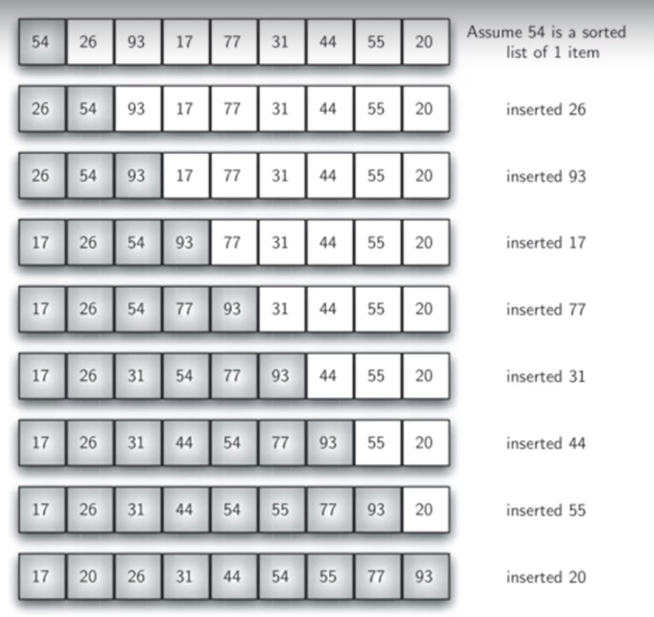

Here is how to insert an item into the sublist:

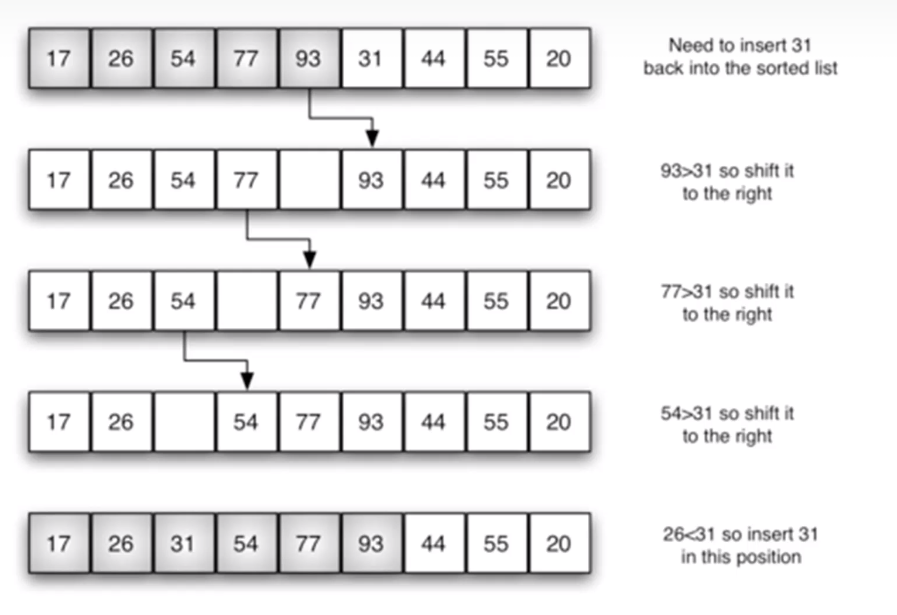

### Implementation

In [7]:
def insertionSort(array):
    
    for i in range(1,len(array)):
        
        current = array[i]
        pos = i
        print(f'current is {current} and pos is {pos}')
        
        while pos > 0 and array[pos-1] > current:
            array[pos] = array[pos-1]
            pos = pos - 1
    
        array[pos] = current
        print(f'array is now {array}')
    return array        

In [8]:
insertionSort([6,7,5,3,2,4,1,8])

current is 7 and pos is 1
array is now [6, 7, 5, 3, 2, 4, 1, 8]
current is 5 and pos is 2
array is now [5, 6, 7, 3, 2, 4, 1, 8]
current is 3 and pos is 3
array is now [3, 5, 6, 7, 2, 4, 1, 8]
current is 2 and pos is 4
array is now [2, 3, 5, 6, 7, 4, 1, 8]
current is 4 and pos is 5
array is now [2, 3, 4, 5, 6, 7, 1, 8]
current is 1 and pos is 6
array is now [1, 2, 3, 4, 5, 6, 7, 8]
current is 8 and pos is 7
array is now [1, 2, 3, 4, 5, 6, 7, 8]


[1, 2, 3, 4, 5, 6, 7, 8]

# Shell Sort

Shell sort is a sorting method that works by turning the origional list into a bunch of sublists. Instead of breaking the list into sublists of items that are together, it uses an increment to create sublist by taking all litems that are that increment apart (we can call this increment 'i' or 'the gap'). You then sort the sublists with insertion sort, put the sublists into a larger list, then do an insertion sort of that to get your sorted list. This may seem like a lot, but it is actually more efficient than insertion sort

### Implementation

In [53]:
def shellSort(array):
    
    subCount = int(len(array)/2)
    
    while subCount > 0:
        for i in range(subCount):
            gapInsertionSort(array,i,subCount)
        print(f'array is now {array}, and subCount is {subCount}')
        subCount = int(subCount / 2)
    return array

In [54]:
def gapInsertionSort(array,start,gap):
    
    for j in range(start + gap,len(array),gap):
        currentVal = array[j]
        position = j
        
        while position >= gap and array[position-gap] > currentVal:
            array[position] = array[position-gap]
            position = position - gap
            
        array[position] = currentVal
        

In [55]:
shellSort([6,7,5,3,2,4,1,8])

array is now [2, 4, 1, 3, 6, 7, 5, 8], and subCount is 4
array is now [1, 3, 2, 4, 5, 7, 6, 8], and subCount is 2
array is now [1, 2, 3, 4, 5, 6, 7, 8], and subCount is 1


[1, 2, 3, 4, 5, 6, 7, 8]

# Merge Sort

Merge sort is a sorting algorithm that works by recursively that keeps splitting a list in half. If the list is empty or has one item, it is sorted, so that is our base/edge case. If it has mroe than one item, then you can split the list again, and do a recursive call on the halves. When both halves are sorted, then a merge is performed. Merging is when you take two smaller sorted  lists and turn them into a big, sorted list. 

### Implementation

In [6]:
def mergeSort(array):
    if len(array) > 1:
        
        mid = len(array)//2
        left = array[:mid]
        right = array[mid:]
        
        # This is the recursive part of the loop
        left = mergeSort(left)
        right = mergeSort(right)
        
        leftInd = 0 
        rightInd = 0
        outArr = []

        # These three loops go through the two sorted lists and merge them together. The first loop goes through the two with two counters, adding the least value into 
        #       an output list. Since the first loop ends whenever one of the two iterators (leftInd or rightInd) reaches the end of their respective lists since there
        #       isn't still a value of both to compare, the list which hasn't had all its values been added gets them all added to the end. 
        while leftInd < len(left) and rightInd < len(right):
            
            if left[leftInd] < right[rightInd]:
                outArr.append(left[leftInd])
                leftInd += 1
            else:
                outArr.append(right[rightInd])
                rightInd += 1
                
            
        while leftInd < len(left):
            outArr.append(left[leftInd])
            leftInd += 1
            
        while rightInd < len(right):
            outArr.append(right[rightInd])
            rightInd += 1
        
        array = outArr
    print(f'merging to form {array}')
    return array

In [7]:
mergeSort([6,7,5,3,2,4,1,8])

merging to form [6]
merging to form [7]
merging to form [6, 7]
merging to form [5]
merging to form [3]
merging to form [3, 5]
merging to form [3, 5, 6, 7]
merging to form [2]
merging to form [4]
merging to form [2, 4]
merging to form [1]
merging to form [8]
merging to form [1, 8]
merging to form [1, 2, 4, 8]
merging to form [1, 2, 3, 4, 5, 6, 7, 8]


[1, 2, 3, 4, 5, 6, 7, 8]

# Quick Sort

Quick sort works by using divide and conquer to solve without using extra storage. However, it is possible that the list might not be divided in half, so performance will go down. How it works is by first selecting a value called the pivot value, whose goal it is to help split the list. THe position of the pivot in the final list, called the split point, is used to divide the list for the next calls to quick sort.

Once the pivot point is decided, there is a partition process. The function finds the split point and moves the items to their correct position in the list relative to the pivot (if it is greater, it will go to the right of the pivot, if it is less it will go to the left). 

There is a leftmark and a rightmark, which converge on the split point. First step, the leftmark is compared to the pivot value. It moves. Then, the leftmark moves to the next slot. Then, the rightmark is compared to the pivot value and moved. When the rightmark becomes less than the pivot and the leftmark is greater, the two are exchanged and the process keeps going on.

Summary:

Pivot point is found

Leftmark and Rightmark are established

Leftmark is compared and moves until it becomes greater than the pivot

Rightmark is compared and moves until it becomes less than the pivot

They swap

THe process continues until the rightmark and leftmark cross over (the leftmark is further in the list than the rightmark). Then, the Pivot point moves to the rightmark, which is the split point.

### Implementation

In [9]:
def quickSort(array):
    
    quickSortHelper(array,0,len(array)-1)
    return array

def quickSortHelper(array, first, last):
    print(f'array is now {array}')
    if first < last:
        splitPoint = partition(array, first, last)
        quickSortHelper(array, first, splitPoint - 1)
        quickSortHelper(array, splitPoint + 1, last)

def partition(array, first, last):
    
    pivotVal = array[first]
    leftMark = first+1
    rightMark = last
    isDone = False
    
    while not isDone:
        while leftMark <= rightMark and array[leftMark] <= pivotVal:
            leftMark += 1
            
        while array[rightMark] >= pivotVal and rightMark >= leftMark:
            rightMark -= 1
            
        if rightMark < leftMark:
            isDone = True
        else:
            temp = array[leftMark]
            array[leftMark] = array[rightMark]
            array[rightMark] = temp
    temp = array[first]
    array[first] = array[rightMark]
    array[rightMark] = temp
    
    return rightMark

In [10]:
quickSort([6,7,5,3,2,4,1,8])

array is now [6, 7, 5, 3, 2, 4, 1, 8]
array is now [4, 1, 5, 3, 2, 6, 7, 8]
array is now [3, 1, 2, 4, 5, 6, 7, 8]
array is now [2, 1, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]
array is now [1, 2, 3, 4, 5, 6, 7, 8]


[1, 2, 3, 4, 5, 6, 7, 8]

Basically, it just recursively moves each point to it's correct position in the array, changing that value over time. 

# Interview problems

In [1]:
#Binary Search
def binarySearch(array,search_for):
    if len(array) == 0:
        return False
    else:
        if array[len(array)//2] == search_for:
            return True
        else:
            if array[len(array)//2] > search_for:
                return binarySearch(array[:len(array)//2],search_for)
            else:
                return binarySearch(array[(len(array)//2)+1:],search_for)

In [2]:
binarySearch([1,2,3,4,5,6,7,8,9,10],7)

True

In [29]:
#bubble Sort
def bubbleSort(array):
    for i in range(len(array)-1,0,-1):
        for j in range(i):
            if array[j] > array[j+1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp
    return array

In [30]:
bubbleSort([6,7,5,3,2,4,1,8])

[1, 2, 3, 4, 5, 6, 7, 8]

In [37]:
#selection sort
def selectionSort(array):
    maxi = 0
    for i in range(len(array)-1,0,-1):
        for j in range(i):
            if array[j] > array[maxi]:
                maxi = j
        temp = array[i]
        array[i] = array[maxi]
        array[maxi] = temp
    return array

In [38]:
selectionSort([6,7,5,3,2,4,1,8])

[1, 2, 3, 4, 5, 6, 8, 7]

In [54]:
#insertion sort
def insertionSort(array):
    
    for i in range(1,len(array)):
        posit = i
        currentVal = array[i]
        while posit > 0 and array[posit-1] > currentVal:
            array[posit] = array[posit-1]
            posit -= 1
        array[posit] = currentVal
    return array

In [55]:
insertionSort([6,7,5,3,2,4,1,8])

[1, 2, 3, 4, 5, 6, 7, 8]